In [1]:
import pandas as pd
import numpy as np

from utilities import split

In [23]:
def lasso_regression(df):
    df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.mean(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using
    from sklearn import linear_model
    # Instantiate model with 1000 decision trees
    reg = linear_model.Lasso(alpha=0.05, max_iter = 10000)
    reg.fit(X_train_scaled, y_train)
    # Train the model on training data
    # Use the forest's predict method on the test data
    predictions = reg.predict(X_test_scaled)
    
    return predictions,y_test

In [24]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = lasso_regression(df)
        #preds = np.reshape(preds,(8,))
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9647730424828751, tolerance: 0.13991564812376595
  positive)
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [25]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
Predictions

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.037410,0.045643,0.053135,-0.042277,0.077675,-0.050418,0.016344,-0.000918
AMR_quarterly_financial_data.csv,-0.057706,-0.001978,-0.028343,0.010690,0.087098,-0.044950,0.010923,-0.020224
AAN_quarterly_financial_data.csv,0.024255,0.051696,0.308826,-0.080969,0.005679,0.054290,-0.001341,0.142743
AAPL_quarterly_financial_data.csv,0.048591,0.039207,0.065973,-0.004324,0.091360,0.089214,0.079554,-0.021949
ABMD_quarterly_financial_data.csv,-0.046874,0.073747,0.052707,0.113708,0.089736,0.054426,0.039630,0.022777
ABT_quarterly_financial_data.csv,0.030354,0.044439,0.007762,0.242086,0.089555,0.006444,-0.236585,-0.018376
ADBE_quarterly_financial_data.csv,0.075071,0.061500,0.070968,0.086372,0.086949,0.019794,0.026927,-0.023310
ADI_quarterly_financial_data.csv,0.114059,0.012337,-0.028907,0.050195,-0.087159,0.007812,0.001295,0.018796
ADM_quarterly_financial_data.csv,-0.000255,0.004253,0.033609,0.076401,0.021791,0.061121,0.006211,0.012795
ADSK_quarterly_financial_data.csv,0.209007,0.273067,0.359955,1.524653,0.199385,-0.310202,-0.123286,0.017582


In [32]:
import matplotlib.pyplot as plt

def give_quarter_performance(Predictions,Labels,quarter):
    Q = Predictions[quarter]
    Q_labels = labels_df[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        
def total_performance(num_quarters):
    total_returns = 100
    q_turnouts = [100]
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
    
    plt.figure(figsize=(10,5))
    plt.plot(q_turnouts)
    plt.ylabel('Portfolio Value')
    plt.xlabel('Quarters')
    plt.title('Lasso Regression Portfolio Performance')
    plt.show()

    print('Compounded Result :'+str(total_returns-100)+str(' %'))

Quarter :1	 Result :6.057304961972984 %
Quarter :2	 Result :6.380476834008538 %
Quarter :3	 Result :4.9081869444231785 %
Quarter :4	 Result :0.3081844968559011 %
Quarter :5	 Result :4.713840023402108 %
Quarter :6	 Result :-5.165678117121489 %
Quarter :7	 Result :-2.6264052706347725 %
Quarter :8	 Result :10.161769325367183 %


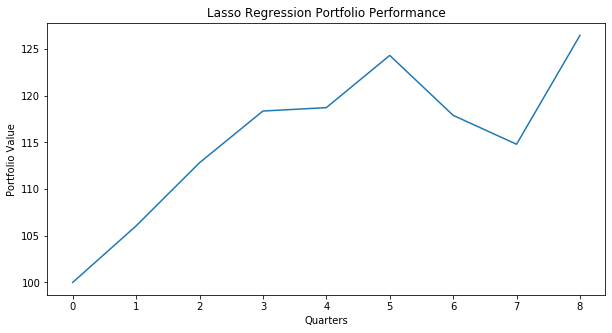

Compounded Result :26.470724406432907 %


In [33]:
total_performance(8)